In [1]:
from functions import extract_gist_features, diversity_experiment
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf

Using TensorFlow backend.


In [2]:
# --- constants/globals --- #

# parameter for gist features
NBLOCKS = 4

# training hyperparameters
LR = .001
MOMENTUM = .9
BATCH_SIZE = 32
RUNS = 10
PATIENCE = 4

# dataset parameters
TRAIN_SIZES = [10, 20, 30, 40, 50, 60, 70, 80, 90]
VAL_SIZE = 1000

In [3]:
# load the mnist data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape to have channels
x_train = x_train.reshape([x_train.shape[0], 
                           x_train.shape[1], 
                           x_train.shape[2], 
                           1])
x_train = np.concatenate([x_train, x_train, x_train], 3)
y_train = y_train.reshape([y_train.shape[0], 1])
x_test = x_test.reshape([x_test.shape[0], 
                         x_test.shape[1], 
                         x_test.shape[2], 
                         1])
x_test = np.concatenate([x_test, x_test, x_test], 3)
y_test = y_test.reshape([y_test.shape[0], 1])

# vgg16 requires at least 32x32
x_train = np.pad(x_train,
                 ((0, 0), (2, 2), (2, 2), (0, 0)), 
                 'constant', constant_values=0)
x_test = np.pad(x_test, 
                ((0, 0), (2, 2), (2, 2), (0, 0)), 
                'constant', constant_values=0)

In [4]:
# extract gist features
if 'mnist_gist_features.npy' not in os.listdir():
    x_gist = extract_gist_features(x_train, 
                                   NBLOCKS)
    np.save('./mnist_gist_features.npy', x_gist)
else:
    x_gist = np.load('mnist_gist_features.npy')

In [5]:
# perform experiment
results_df = diversity_experiment(x_train, y_train, x_gist, 
                                  x_test, y_test, 
                                  train_sizes=TRAIN_SIZES,
                                  val_size=VAL_SIZE,
                                  runs=RUNS,
                                  lr=LR, momentum=MOMENTUM, 
                                  batch_size=BATCH_SIZE,
                                  patience=PATIENCE,
                                  verbose=0)

performing experiment for train size=10
performing experiment for train size=20
performing experiment for train size=30
performing experiment for train size=40
performing experiment for train size=50
performing experiment for train size=60
performing experiment for train size=70
performing experiment for train size=80
performing experiment for train size=90


In [6]:
results_df.to_csv('mnist-results-small-data.csv')

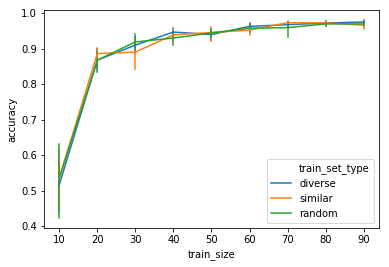

In [7]:
sns.lineplot(data=results_df, 
             x='train_size', y='accuracy', hue='train_set_type',
             err_style='bars')